In [ ]:
%run 'StreamTemp-Integ.py'

loading package hydroDL
optData:  OrderedDict([('name', 'hydroDL.data.camels.DataframeCamels'), ('subset', 'All'), ('varT', ['dayl(s)', 'prcp(mm/day)', 'srad(W/m2)', 'tmax(C)', 'tmin(C)', 'vp(Pa)', '00060_Mean']), ('varC', ['DRAIN_SQKM', 'STREAMS_KM_SQ_KM', 'STOR_NID_2009', 'FORESTNLCD06', 'PLANTNLCD06', 'SLOPE_PCT', 'RAW_DIS_NEAREST_MAJ_DAM', 'PERDUN', 'RAW_DIS_NEAREST_DAM', 'RAW_AVG_DIS_ALL_MAJ_DAMS', 'T_MIN_BASIN', 'T_MINSTD_BASIN', 'RH_BASIN', 'RAW_AVG_DIS_ALLDAMS', 'PPTAVG_BASIN', 'HIRES_LENTIC_PCT', 'T_AVG_BASIN', 'T_MAX_BASIN', 'T_MAXSTD_BASIN', 'NDAMS_2009', 'ELEV_MEAN_M_BASIN']), ('target', ['S', 't', 'r', 'e', 'a', 'm', 'T', 'e', 'm', 'p']), ('tRange', [20101001, 20141001]), ('doNorm', [True, True]), ('rmNan', [True, False]), ('daObs', 0), ('damean', False), ('davar', 'streamflow'), ('dameanopt', 0), ('lckernel', None), ('fdcopt', False)])
TempTarget:  00010_Mean
forcing_path:  /caldera/projects/usgs/water/iidd/datasci/psu/LSTM_temp2/scratch/SNTemp/Forcing/Forcing_new/forcing

In [4]:
import os
os.environ['PROJ_LIB'] = r'/root/miniconda3/share/proj/'
from mpl_toolkits import basemap

ModuleNotFoundError: No module named 'mpl_toolkits'

In [7]:
sys.path.append('/cm/local/apps/cuda/libs/current/bin')
sys.path.append('/cm/shared/apps/cuda10.1/sdk/10.1.105/bin/x86_64/linux/release')
sys.path.append('/cm/shared/apps/cuda10.1/toolkit/10.1.105/bin')

In [2]:
import torch
torch.cuda.is_available()

### Checking model outputs
Need to join on site_no column from attributes file for each set of outputs
Then can compare proper 99 rows from data release

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_release_pred = np.load('../rahmani-resdag-data-release/in_data/Results/99_10/pred_2000_50_365_70_2014_2016_ens.npy')[:,:,0]
data_release_pred.shape

(415, 731)

In [5]:
data_release_pred[:,:,0]

array([[10.74795432, 10.11456208,  9.91757803, ...,  9.69127798,
         9.68111407,  9.63146966],
       [13.43343203, 13.93829951, 14.06921836, ..., 14.49949198,
        14.40545082, 13.61176929],
       [13.09255657, 12.76268032, 11.88573475, ..., 13.32125981,
        12.68543306, 11.76370636],
       ...,
       [11.30713733, 12.25279024, 13.3458352 , ..., 14.56007991,
        14.2886542 , 13.34763929],
       [12.13612337, 13.15699154, 14.36627926, ..., 15.33453819,
        14.85515821, 13.79667905],
       [13.24163001, 14.49387621, 15.85273623, ..., 17.30172331,
        16.95963763, 16.1826435 ]])

In [13]:
this_run_pred = np.load('TempDemo/FirstRun/epochs2000_batch47_rho365_hiddensize100_Tstart20101001_Tend20141001_1/All-2010-2016/pred.npy')[:,:,0]
this_run_pred.shape

(99, 731)

In [11]:
attr = pd.read_feather('scratch/SNTemp/Forcing/attr_new/attr_temp99%_days_99sites_newv1.feather')
attr_data_release = pd.read_feather('../rahmani-resdag-data-release/in_data/Forcings_attr/attr_temp10__days_415sites.feather')
data_release_rows = attr_data_release['site_no'].isin(attr['site_no'])

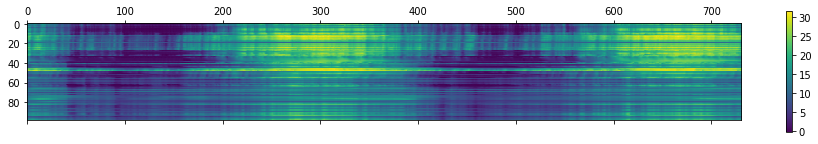

In [18]:
data_release_pred_filtered = data_release_pred[data_release_rows, :]
plt.matshow(data_release_pred_filtered)
plt.colorbar()
plt.show()

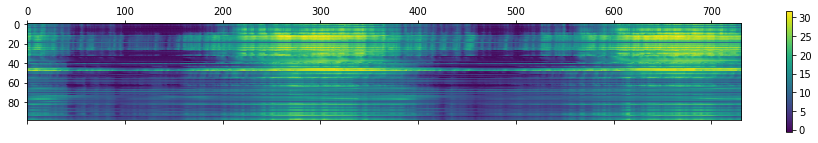

In [19]:
#compare predictions
this_run_pred.shape
plt.matshow(this_run_pred)
plt.colorbar()
plt.show()

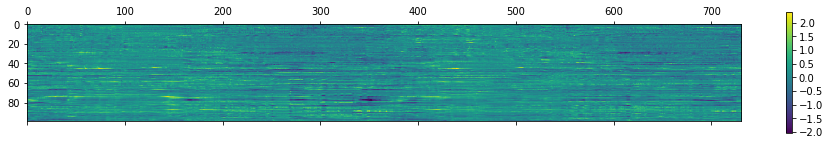

In [26]:
diff = this_run_pred - data_release_pred_filtered
diff.shape
plt.matshow(diff)
plt.colorbar()
plt.show()

In [25]:
np.sqrt(np.mean(diff ** 2))

0.3736140175963538

In [6]:
import torch
print(torch.__file__)
import pkg_resources
pkg_resources.get_distribution("torch").version


SyntaxError: invalid syntax (<ipython-input-6-01397fbdd5de>, line 5)

In [12]:
os.listdir('/root/miniconda3/lib/python3.6/site-packages')

PermissionError: [Errno 13] Permission denied: '/root/miniconda3/lib/python3.6/site-packages'